
<blockquote>
This is a lecture notebook that we have used for past boot camps, but did not use this year.

Feel free to read through it to learn about making confidence and prediction intervals around a regression line.
</blockquote>

# Interval Estimation

We continue our walk through regression land by discuss how we can use our assumptions on $\epsilon$ in the regression model to produce uncertainty surrounding $y$.

## What we will accomplish

In this notebook we will:
- Recall linear regression assumptions
- Discuss uncertainty around the expected value of $y$
- Discuss uncertainty around the predicted value of $y$
- See confidence and prediction intervals

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

## Assumptions on $\epsilon$

Once again recall our model for linear regression:

$$
y = X \beta + \epsilon, \text{ for } \epsilon \sim N(0,\sigma).
$$

Fitting this model and finding a $\hat{\beta}$, allows us to estimate $E(y|X=X^*)$. We may have two questions of interest after this step:

1. Our fitted line gives a point estimate for $E(y|X=X^*)$, but what are reasonable possible values for this estimate if I were to repeat the data collection and fitting processes over again?

2. According to this data, for a given value of $X$ what is the distribution of $y$?

We will attempt to answer both in this slightly more stats heavy notebook.

## Confidence intervals for the regression line

### Confidence intervals in general

Suppose we are estimating some parameter, $\gamma$, with a point estimate $\hat{\gamma}$.

While point estimates are nice, it is sometimes preferable to have an estimate of a range of plausible values for $\gamma$. This is the idea behind <i>confidence intervals</i>. A confidence interval is a range of values that contain the true parameter with some probability, typically given by $100*(1-\alpha)$.

<i>Note: the randomness for this range is entirely affiliated with the interval, not the true parameter. The true parameter is not random at all, the estimates are. Thus when we construct a confidence interval, $(a,b)$, we would say that there is a $100*(1-\alpha)$ chance that contains the true parameter $\gamma$.</i>

The typical construction of a confidence interval for any parameter is:

$$
\hat{\gamma} \ \pm \ p_{(1-\alpha/2)} \text{SE}(\hat{\gamma}),
$$

where $p_{(1-\alpha/2)}$ is a probability modifier found by locating the value, $p^*$, such that $P(p \leq p^*) =  1-\alpha/2$ and $\text{SE}(\hat{\gamma})$ is the standard error of the estimate, found by taking the square root of the variance of the estimate.

### Confidence interval for $E(y|X=X^*)$ in simple linear regression

In the simple linear regression homework notebook we derive that the $\text{SE}(\hat{y})$ (recall that $\hat{y}$ is the estimate for $E(y|X=X^*)$) is:

$$
\sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}\sqrt{\frac{1}{n} + \frac{\left(X^* - \overline{X}\right)^2}{(n-1)s_X^2}}
$$

Because we are estimating the variance of $\epsilon$ the probability modifier is drawn from a studentized $t$ distribution with $n-2$ degrees of freedom, denoted as $t_{n-2, 1-\alpha/2}$. So the $(1-\alpha)$ confidence interval is given by:

$$
\hat{y} \pm t_{n-2, 1-\alpha/2} \sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}\sqrt{\frac{1}{n} + \frac{\left(X^* - \overline{X}\right)^2}{(n-1)s_X^2}}
$$

Let's now demonstrate this with some generated data.

In [2]:
np.random.seed(888)
x = 4*np.random.randn(500) - 2
y = 1 + 2*x + 5*np.random.randn(500)

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
slr = LinearRegression(copy_X=True)
slr.fit(x.reshape(-1,1), y)

LinearRegression()

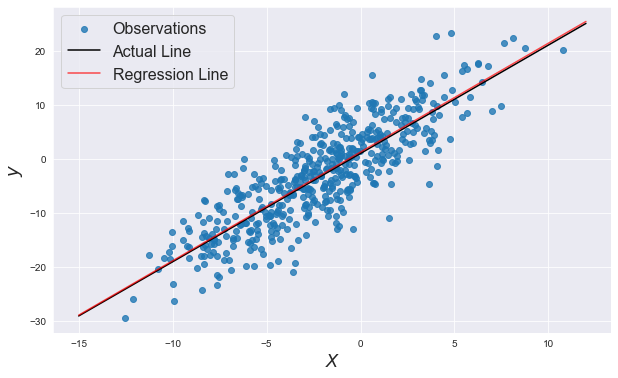

In [5]:
plt.figure(figsize=(10,6))

plt.scatter(x, y, alpha=.8, label="Observations")

plt.plot(np.linspace(-15, 12, 100),
            1 + 2*np.linspace(-15, 12, 100),
            'k-',
            linewidth=1.5,
            label="Actual Line")

plt.plot(np.linspace(-15, 12, 100),
            slr.predict(np.linspace(-15, 12, 100).reshape(-1,1)),
            'r-',
            alpha=.7,
            label="Regression Line")

plt.legend(fontsize=16)
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

plt.show()

In [6]:
## This gives us the t-distribution modifier
from scipy.stats import t

In [7]:
## We call t.ppf(1-alpha/2, n-2)
t.ppf(1-.05/2, len(y)-2)

1.9647389829672648

In [8]:
## Get the estimate of sigma for epsilon
sigma_hat = np.sqrt(np.sum(np.power(y - slr.predict(x.reshape(-1,1)),2))/(len(y)-2))

## write a function to get the standard error
def confidence_se(sigma_hat,x_star, x):
    return sigma_hat * np.sqrt((1/len(x) + np.power(x_star - np.mean(x), 2)/((len(x) - 1)*(np.std(x)**2))))

In [9]:
confidence_se(sigma_hat,np.linspace(-1,1,10), x)

array([0.2315041 , 0.23535298, 0.23981974, 0.24487057, 0.25047014,
       0.25658251, 0.26317197, 0.27020362, 0.27764385, 0.28546072])

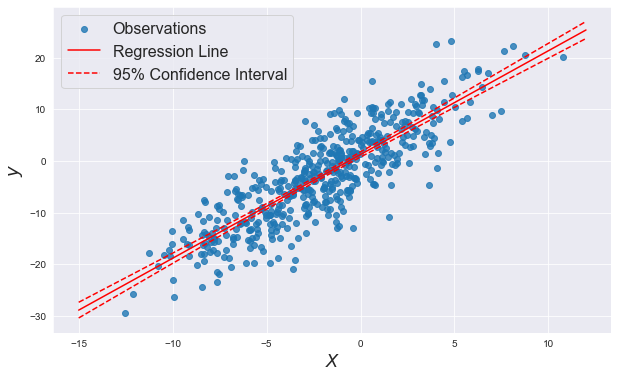

In [10]:
## This will plot a 95% confidence interval around the regression line
plt.figure(figsize=(10,6))

plt.scatter(x, y, alpha=.8, label="Observations")

plt.plot(np.linspace(-15, 12, 100),
            slr.predict(np.linspace(-15, 12, 100).reshape(-1,1)),
            'r-',
            label="Regression Line")

upper = slr.predict(np.linspace(-15, 12, 100).reshape(-1,1)) + t.ppf(1-(.05/2), len(y)-2) * confidence_se(sigma_hat,
                                                                                                          np.linspace(-15, 12, 100),
                                                                                                          x)
lower = slr.predict(np.linspace(-15, 12, 100).reshape(-1,1)) - t.ppf(1-(.05/2), len(y)-2) * confidence_se(sigma_hat,
                                                                                                          np.linspace(-15, 12, 100),
                                                                                                          x)



plt.plot(np.linspace(-15, 12, 100),
            upper,
            'r--',
            label="95% Confidence Interval")
plt.plot(np.linspace(-15, 12, 100),
            lower,
            'r--')




plt.legend(fontsize=16)
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

plt.show()

#### `sns.regplot`

`seaborn` also has a nice function that makes such a plot for you called `regplot`, <a href="https://seaborn.pydata.org/generated/seaborn.regplot.html">https://seaborn.pydata.org/generated/seaborn.regplot.html</a>.

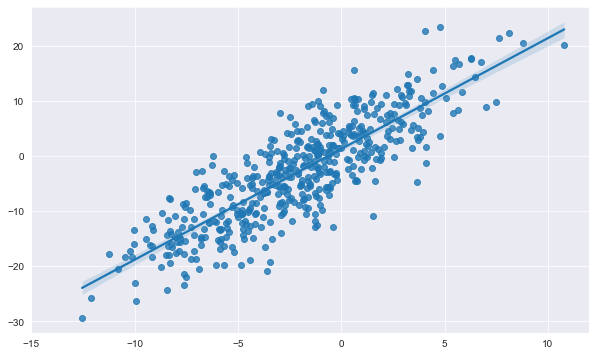

In [11]:
plt.figure(figsize=(10,6))

sns.regplot(x=x, y=y, ci=95)

plt.xlim(-15,12)

plt.show()

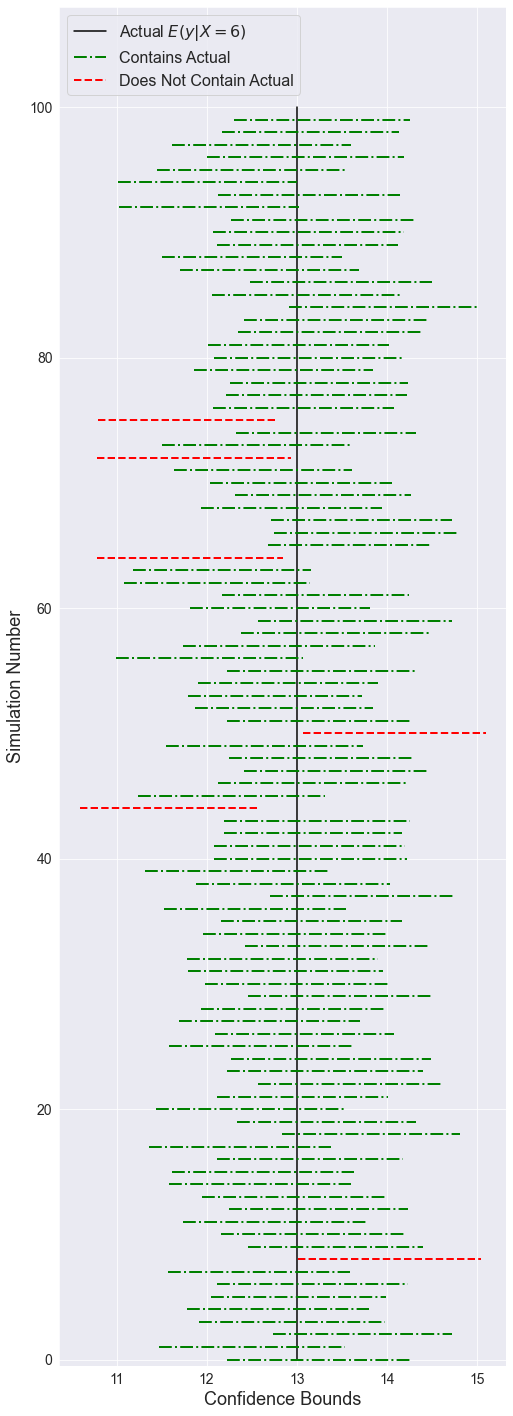

In [12]:
## Here I'll demonstrate the interpretation of the confidence interval


## When x = 6 we know that E(y|x=6) = 1 + 2*6 = 13

## we'll simulate 100 random draws, calculate the confidence intervale
## then plot the results
intervals = []
for i in range(100):
    # generate a new y
    y_draw = 1 + 2*x + 5*np.random.randn(500)
    
    # fit the model for new y
    slr_draw = LinearRegression(copy_X = True)
    slr_draw.fit(x.reshape(-1,1), y_draw)
    
    # generate confidence bounds for this new regression line at x=6
    alpha = .05
    sigma_hat_draw = np.sqrt(np.sum(np.power(y_draw - slr_draw.predict(x.reshape(-1,1)),2))/(len(y_draw)-2))
    se = confidence_se(sigma_hat_draw, 6, x)
    y_hat = slr_draw.predict([[6]])[0]
    intervals.append([y_hat - t.ppf(1-(alpha/2), len(y_draw)-2)*se,
                          y_hat + t.ppf(1-(alpha/2), len(y_draw)-2)*se])
    
    

# make a plot
plt.figure(figsize=(8,25))
first_green = True
first_red = True

plt.plot([13,13], [0,100], 'k-', label="Actual $E(y|X=6)$")
for i in range(100):
    if (13 > intervals[i][0]) & (13<intervals[i][1]):
        if first_green:
            plt.plot(intervals[i], [i, i], 'g-.', linewidth=2, label="Contains Actual")
            first_green=False
        else:
            plt.plot(intervals[i], [i, i], 'g-.', linewidth=2)
    else:
        if first_red:
            plt.plot(intervals[i], [i, i], 'r--', linewidth=2, label="Does Not Contain Actual")
            first_red=False
        else:
            plt.plot(intervals[i], [i, i], 'r--', linewidth=2)


plt.legend(fontsize=16, loc=2)
plt.ylim((-.5,108))

plt.ylabel("Simulation Number", fontsize=18)
plt.xlabel("Confidence Bounds", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)


plt.show()

#### Confidence bounds for multiple linear regression

While we focused on simple linear regression here, you can also derive confidence bounds for multiple linear regression. However, we will not derive formulas for this because the derivation is much more complicated. However a simple web search should return the formulas you need, you may also look for a package to calculate it for you. `statsmodels` may be a good place to start in python. R is also a good choice.

## Prediction intervals for $y$

In addition to having a plausible interval for the expected value of $y$ for a given value of $X$, it is also useful to have some sense for a plausible interval for actual values of $y$ for a given value of $X$. Note that there is a key difference between these two intervals.

The first is an interval for the average value of $y$ at a given value of $X$.

The second is an interval for actual values of $y$ at a given value of $X$.

We discussed the first above, the second is referred to as a <i>prediction interval</i> and will be discussed now. 

From the Simple Linear Regression Homework notebook we have for simple linear regression the $(1-\alpha)$ prediction interval for $y|X=X^*$ is given by:

$$
\hat{y} \pm t_{n-2,(1-\alpha/2)}\sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}\sqrt{1 + \frac{1}{n} + \frac{\left(X^* - \overline{X}\right)^2}{(n-1)s_X^2}}.
$$

<i>Again I will note that there are formulae for multiple linear regression as well, but these are far more complicated to derive and present. Further, most people just use statistical software (again look at `statsmodels` in python or R)</i>.

We'll end this notebook by looking at the prediction interval around our regression data from above.

In [13]:
def prediction_se(sigma_hat, x_star, x):
    right = np.power(x_star-np.mean(x),2)/((len(x)-1)*np.std(x)**2)
    return sigma_hat*np.sqrt(1 + 1/len(x) + right)

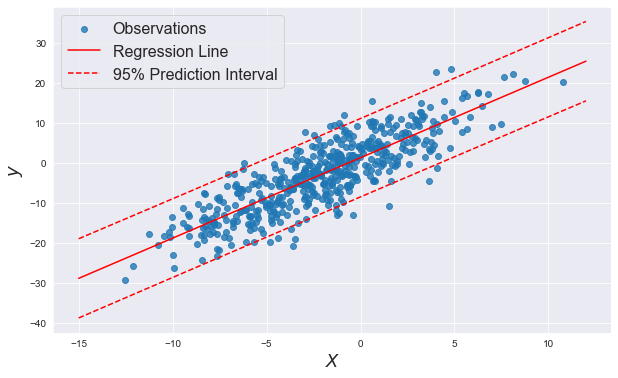

In [14]:
## This will plot a 95% confidence interval around the regression line
alpha=.05
plt.figure(figsize=(10,6))

plt.scatter(x, y, alpha=.8, label="Observations")

plt.plot(np.linspace(-15, 12, 100),
            slr.predict(np.linspace(-15, 12, 100).reshape(-1,1)),
            'r-',
            label="Regression Line")

upper = slr.predict(np.linspace(-15, 12, 100).reshape(-1,1)) + t.ppf(1-(alpha/2), len(y)-2) * prediction_se(sigma_hat,
                                                                                                          np.linspace(-15, 12, 100),
                                                                                                          x)
lower = slr.predict(np.linspace(-15, 12, 100).reshape(-1,1)) - t.ppf(1-(alpha/2), len(y)-2) * prediction_se(sigma_hat,
                                                                                                          np.linspace(-15, 12, 100),
                                                                                                          x)



plt.plot(np.linspace(-15, 12, 100),
            upper,
            'r--',
            label="95% Prediction Interval")
plt.plot(np.linspace(-15, 12, 100),
            lower,
            'r--')




plt.legend(fontsize=16)
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

plt.show()

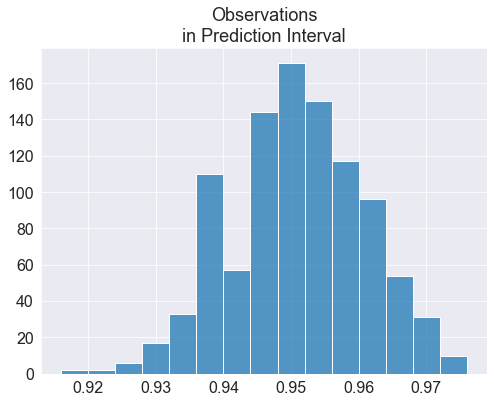

In [15]:
## Here I'll demonstrate the interpretation of the prediction interval

## get the upper and lower bounds when x=6
upper_6 = slr.predict([[6]])[0] + t.ppf(1-(alpha/2), len(y)-2) * prediction_se(sigma_hat,
                                                                                      6,
                                                                                      x)
lower_6 = slr.predict([[6]])[0] - t.ppf(1-(alpha/2), len(y)-2) * prediction_se(sigma_hat,
                                                                                  6,
                                                                                  x)
## we'll simulate 1000 random draws, see the proportion of observations 
## that fall between the prediction interval
betweens = []
for i in range(1000):
    # generate a new y draw for x=6
    y_draw = 1 + 2*6 + 5*np.random.randn(500)
    
    # how many fall in the interval
    betweens.append(np.sum((y_draw<upper_6) & (y_draw>lower_6))/len(y_draw))
    
    
plt.figure(figsize=(8,6))

sns.histplot(x=betweens, bins=15)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("")
plt.title("Observations\nin Prediction Interval", fontsize=18)

plt.show()

While these may not factor into making the best predictive model possible, they can be key for interpreting your results and helping you or your team make decisions.

--------------------------

This repository was written for the 2021 Erdős Institute Fall Data Science Semester by Matthew Osborne, Ph. D., 2021.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute. (see License.md)